In [1]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import numpy as np
import healpy as hp
from astropy.io import fits
from pprint import pprint
from tqdm import tqdm
import pickle
import corner
import os

from scipy import optimize
from scipy.stats import poisson

import jax

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../utils/matplotlibrc')

In [2]:
from models.poissonian_og import EbinPoissonModel
ebinmodel = EbinPoissonModel(nside=128, nfw_gamma = 1.)
ebinmodel.config_model(ebin=10)
svi_results = ebinmodel.fit_SVI(
    rng_key=jax.random.PRNGKey(0),
    guide='iaf', 
    n_steps=10000, lr=5e-5, num_particles=16,
    ebin=10,
)

jax.config.update('jax_enable_x64', True)
ebinmodel.run_parallel_tempering_hmc(num_samples=50000, use_neutra=False, num_adaptation_steps = 150000)
samples = ebinmodel.expand_samples(ebinmodel.pt_mcmc.get_samples())
pickle.dump(samples, open('ebin10_pthmc_50000_250000_upscaledLL.p', 'wb'))

/home/edr76/.conda/envs/jax/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
sample: 100%|██████████| 200000/200000 [05:38<00:00, 590.93it/s]


Text(0, 0.5, 'Loss')

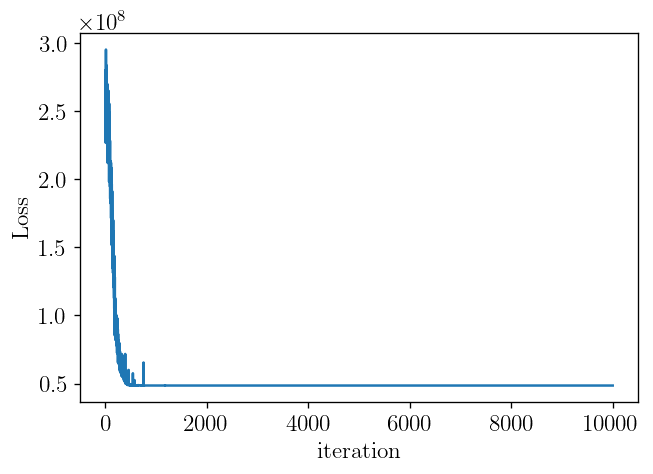

In [3]:
plt.plot(svi_results.losses)
plt.xlabel('iteration')
plt.ylabel('Loss')  

In [4]:
# save svi results and samples to file

file_name = ('ebin10' + '_smp_svi_' + '131' + '.p')
pickle.dump(
    (samples, svi_results), 
    open(file_name, 'wb'))